# Ford GoBike System Dataset Exploration
## by Ibrahim Alsagaby


## Investigation Overview

> in this investigation, i want to show some interesting relations between some features of our system users.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
go_bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

# some added features to help demenstrait

go_bike_df["start_time"] = go_bike_df["start_time"].astype("datetime64[ns]")
go_bike_df["end_time"] = go_bike_df["end_time"].astype("datetime64[ns]")

#############################################################################

go_bike_df["duration_hour"] = go_bike_df["duration_sec"] / 3600 # Dividing by 3600 to convert seconds to hours

#############################################################################

go_bike_df = go_bike_df[go_bike_df["member_birth_year"] > 1940]

go_bike_df["member_age"] = 2021 - go_bike_df["member_birth_year"] # 2021 minus the member birth year will give us thier approximate age



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Members age distrbution

> In the shown graph you will get an info about the range of our members age 

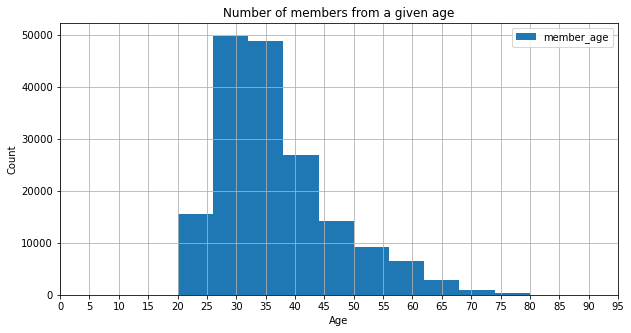

In [3]:
go_bike_df[['member_age']].plot(kind='hist', figsize=(10,5), grid=True)
plt.title("Number of members from a given age")
plt.xticks(np.arange(20)*5)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Duration in hours per member age 

> in this graph we can see the relation between the members age and the duration in their trips

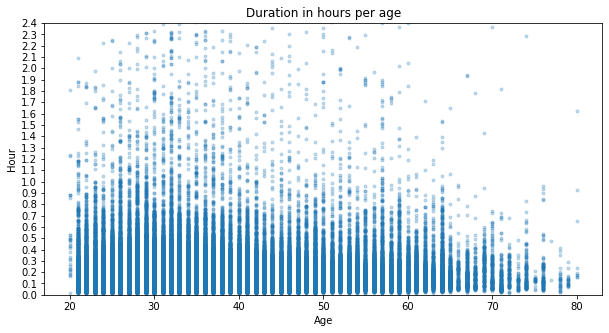

In [9]:
ticks = np.arange(0, 2.5, 0.1)
plt.figure(figsize=(10,5))
plt.ylim(ymin=0)
plt.yticks(ticks)
plt.scatter(go_bike_df["member_age"], go_bike_df["duration_hour"], marker=".", alpha=0.25)
plt.title("Duration in hours per age")
plt.xlabel("Age")
plt.ylabel("Hour")
plt.show()

## Day and gender vs duration per hour
> the relation between duration in hours for each day of the week for each gender.


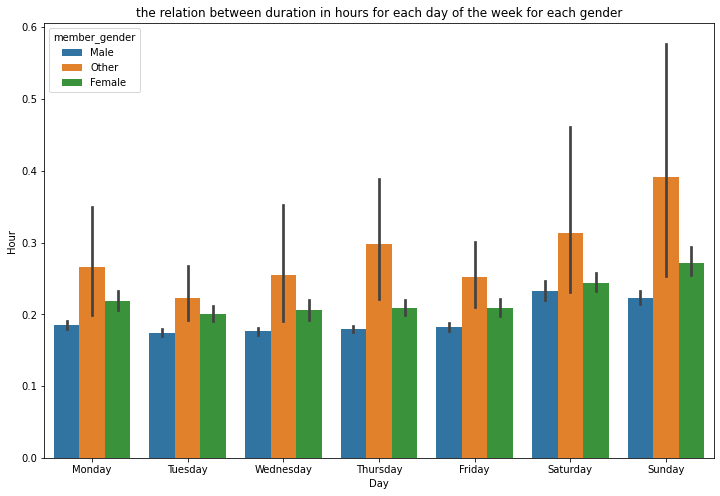

In [8]:
#a plot to show the relation between duration in hours for each day of the week for each gender
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.figure(figsize=(12,8))
sb.barplot(x=go_bike_df.start_time.dt.day_name(), y= go_bike_df.duration_hour, hue=go_bike_df.member_gender, data=go_bike_df, order=day_order)
plt.title("the relation between duration in hours for each day of the week for each gender")
plt.xlabel("Day")
plt.ylabel("Hour")
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!